## Importar librerías

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

## Carga y Exploración de Base de Datos

In [ ]:
#Enlace que trae el archivo desde github
url = "https://raw.githubusercontent.com/elianasv/Proyecto-IA/main/H1N1_Flu_Vaccines.csv"

# Cargar el archivo csv
df = pd.read_csv(url)
df = df.dropna()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
7,7,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,Own,Employed,bhuqouqj,Non-MSA,2.0,0.0,pxcmvdjn,xqwwgdyp,1,1
10,10,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Rent,Employed,lzgpxyit,"MSA, Not Principle City",2.0,0.0,xicduogh,qxajmpny,1,1
11,11,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,Own,Employed,oxchjgsf,Non-MSA,1.0,2.0,xicduogh,ccgxvspp,1,1
15,15,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,Own,Employed,lzgpxyit,"MSA, Not Principle City",1.0,3.0,wxleyezf,emcorrxb,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26681,26681,2.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,Own,Employed,lrircsnp,"MSA, Not Principle City",1.0,0.0,arjwrbjb,bxpfxfdn,0,0
26683,26683,1.0,2.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,...,Own,Employed,fpwskwrf,"MSA, Not Principle City",1.0,0.0,fcxhlnwr,cmhcxjea,1,1
26690,26690,0.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,Own,Employed,mlyzmhmf,"MSA, Principle City",2.0,1.0,mcubkhph,oijqvulv,0,0
26699,26699,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,pxcmvdjn,xgwztkwe,0,0


## Definición de Funciones

In [ ]:
def plot_confusion_matrix(y_true, y_pred, labels, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(4, 3.5))
    ax = sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels, cbar = False)
    ax.set_xticklabels(ax.get_xmajorticklabels(), fontsize=9)
    ax.set_yticklabels(ax.get_xmajorticklabels(), fontsize=9)
    plt.xlabel('Predicciones', fontweight='bold')
    plt.ylabel('Valores reales', fontweight='bold')
    plt.title(title, fontweight='bold')
    plt.show()

## Distribución de Datos

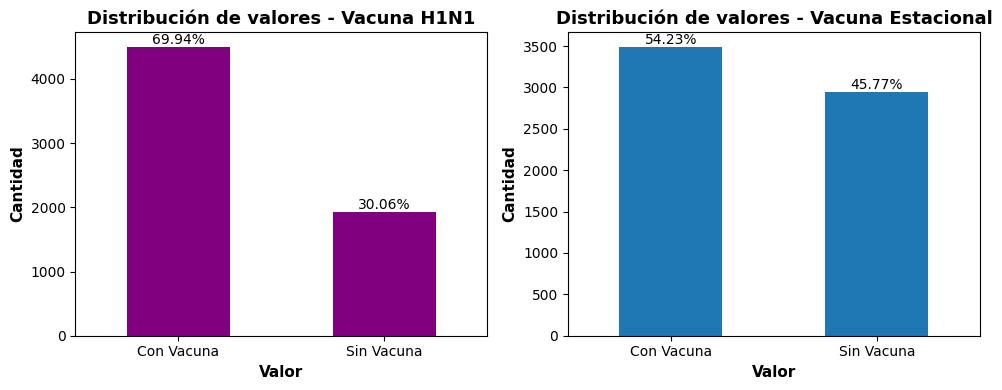

In [ ]:
label_seasonal = df['seasonal_vaccine']
label_h1n1 = df['h1n1_vaccine']

fig, axs = plt.subplots(1, 2, figsize=(10, 4))

axs[0].set_title('Distribución de valores - Vacuna H1N1', fontsize=13, fontweight='bold')
value_counts_h1n1 = label_h1n1.value_counts()
label_h1n1.value_counts().plot(kind='bar', ax=axs[0], color = 'purple')
axs[0].set_xlabel('Valor', fontsize=11, fontweight='bold')
axs[0].set_ylabel('Cantidad', fontsize=11, fontweight='bold')
etiquetas_h1n1 = ['Con Vacuna', 'Sin Vacuna']
valores_h1n1 = [0, 1]
axs[0].set_xticks(valores_h1n1)
axs[0].set_xticklabels(etiquetas_h1n1, rotation=0)

for i, v in enumerate(value_counts_h1n1):
    axs[0].text(i, v, f"{(v / len(label_h1n1) * 100):.2f}%", ha='center', va='bottom')

axs[1].set_title('Distribución de valores - Vacuna Estacional', fontsize=13, fontweight='bold')
value_counts_seasonal = label_seasonal.value_counts()
label_seasonal.value_counts().plot(kind='bar', ax=axs[1])
axs[1].set_xlabel('Valor', fontsize=11, fontweight='bold')
axs[1].set_ylabel('Cantidad', fontsize=11, fontweight='bold')
etiquetas_seasonal = ['Con Vacuna', 'Sin Vacuna']
valores_seasonal = [0, 1]
axs[1].set_xticks(valores_seasonal)
axs[1].set_xticklabels(etiquetas_seasonal, rotation=0)

for i, v in enumerate(value_counts_seasonal):
    axs[1].text(i, v, f"{(v / len(label_seasonal) * 100):.2f}%", ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [ ]:
datos = df.copy()

datos = datos.iloc[:, :-2]
datos = datos.drop(datos.columns[0], axis=1)
datos = datos.dropna()
datos = datos.astype('category')

data = pd.get_dummies(datos)

data

,h1n1_concern_0.0,h1n1_concern_1.0,h1n1_concern_2.0,h1n1_concern_3.0,h1n1_knowledge_0.0,h1n1_knowledge_1.0,h1n1_knowledge_2.0,behavioral_antiviral_meds_0.0,behavioral_antiviral_meds_1.0,behavioral_avoidance_0.0,...,employment_occupation_qxajmpny,employment_occupation_rcertsgn,employment_occupation_tfqavkke,employment_occupation_ukymxvdu,employment_occupation_uqqtjvyb,employment_occupation_vlluhbov,employment_occupation_xgwztkwe,employment_occupation_xqwwgdyp,employment_occupation_xtkaffoo,employment_occupation_xzmlyyjv
1,0,0,0,1,0,0,1,1,0,0,...,0,0,0,0,0,0,1,0,0,0
7,0,1,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
10,0,0,1,0,0,1,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
11,0,1,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
15,0,1,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26681,0,0,1,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
26683,0,1,0,0,0,0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
26690,1,0,0,0,0,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
26699,0,0,1,0,0,0,1,1,0,0,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data, label_h1n1, test_size=0.2, random_state=42)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data, label_seasonal, test_size=0.2, random_state=42)

## Entrenamiento y Prueba del Modelo - Vacuna H1N1

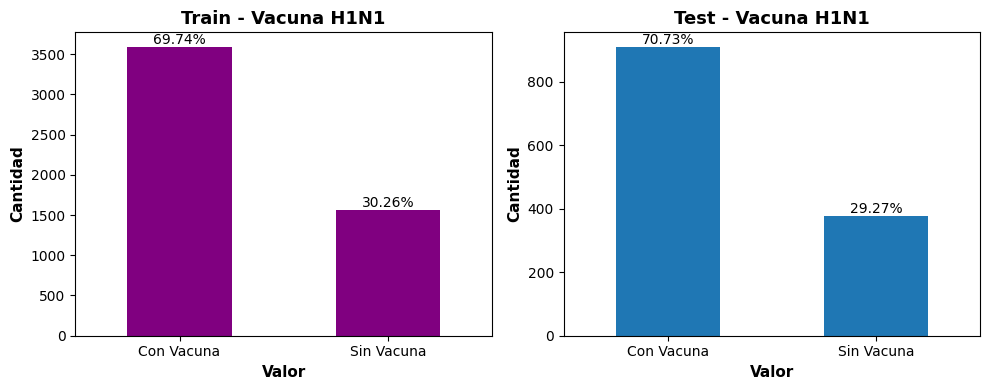

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

axs[0].set_title('Train - Vacuna H1N1', fontsize=13, fontweight='bold')
value_train_h1n1 = y_train.value_counts()
y_train.value_counts().plot(kind='bar', ax=axs[0], color = 'purple')
axs[0].set_xlabel('Valor', fontsize=11, fontweight='bold')
axs[0].set_ylabel('Cantidad', fontsize=11, fontweight='bold')
etiquetas_h1n1 = ['Con Vacuna', 'Sin Vacuna']
valores_h1n1 = [0, 1]
axs[0].set_xticks(valores_h1n1)
axs[0].set_xticklabels(etiquetas_h1n1, rotation=0)

for i, v in enumerate(value_train_h1n1):
    axs[0].text(i, v, f"{(v / len(y_train) * 100):.2f}%", ha='center', va='bottom')

axs[1].set_title('Test - Vacuna H1N1', fontsize=13, fontweight='bold')
value_test_h1n1 = y_test.value_counts()
y_test.value_counts().plot(kind='bar', ax=axs[1])
axs[1].set_xlabel('Valor', fontsize=11, fontweight='bold')
axs[1].set_ylabel('Cantidad', fontsize=11, fontweight='bold')
axs[1].set_xticks(valores_h1n1)
axs[1].set_xticklabels(etiquetas_h1n1, rotation=0)

for i, v in enumerate(value_test_h1n1):
    axs[1].text(i, v, f"{(v / len(y_test) * 100):.2f}%", ha='center', va='bottom')

plt.tight_layout()
plt.show()

### Variación de Estructura

#### *Modelo 1*

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model_h1n1_P3 = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(32, activation='sigmoid'),
    layers.Dense(1, activation='sigmoid')
])

model_h1n1_P3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model_h1n1_P3.fit(X_train, y_train, epochs=15, batch_size=64, validation_data=(X_test, y_test))

loss, accuracy = model_h1n1_P3.evaluate(X_test, y_test)
print(f'Pérdida: {loss:.2f}, Accuracy: {accuracy*100:.2f}%')

Epoch 1/15
81/81 [==============================] - 6s 31ms/step - loss: 0.5076 - accuracy: 0.7555 - val_loss: 0.4367 - val_accuracy: 0.8051
Epoch 2/15
81/81 [==============================] - 1s 10ms/step - loss: 0.4244 - accuracy: 0.8103 - val_loss: 0.4038 - val_accuracy: 0.8214
Epoch 3/15
81/81 [==============================] - 1s 8ms/step - loss: 0.4004 - accuracy: 0.8223 - val_loss: 0.3904 - val_accuracy: 0.8307
Epoch 4/15
81/81 [==============================] - 1s 7ms/step - loss: 0.3888 - accuracy: 0.8268 - val_loss: 0.3869 - val_accuracy: 0.8346
Epoch 5/15
81/81 [==============================] - 1s 7ms/step - loss: 0.3820 - accuracy: 0.8310 - val_loss: 0.3847 - val_accuracy: 0.8346
Epoch 6/15
81/81 [==============================] - 1s 9ms/step - loss: 0.3776 - accuracy: 0.8336 - val_loss: 0.3843 - val_accuracy: 0.8354
Epoch 7/15
81/81 [==============================] - 1s 12ms/step - loss: 0.3740 - accuracy: 0.8380 - val_loss: 0.3848 - val_accuracy: 0.8370
Epoch 8/15
81/81 

In [ ]:
y_pred = model_h1n1_P3.predict(X_test)
print(classification_report(y_test, np.round(y_pred)))

41/41 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0       0.87      0.89      0.88       911
           1       0.73      0.69      0.71       377

    accuracy                           0.83      1288
   macro avg       0.80      0.79      0.79      1288
weighted avg       0.83      0.83      0.83      1288



#### *Modelo 2*

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model_h1n1_P = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(64, activation='sigmoid'),
    layers.Dense(1, activation='sigmoid')
])

model_h1n1_P.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model_h1n1_P.fit(X_train, y_train, epochs=15, batch_size=64, validation_data=(X_test, y_test))

loss, accuracy = model_h1n1_P.evaluate(X_test, y_test)
print(f'Pérdida: {loss:.2f}, Accuracy: {accuracy*100:.2f}%')

Epoch 1/15
81/81 [==============================] - 2s 11ms/step - loss: 0.7444 - accuracy: 0.5601 - val_loss: 0.4619 - val_accuracy: 0.8144
Epoch 2/15
81/81 [==============================] - 0s 3ms/step - loss: 0.4291 - accuracy: 0.8128 - val_loss: 0.4061 - val_accuracy: 0.8284
Epoch 3/15
81/81 [==============================] - 0s 3ms/step - loss: 0.3998 - accuracy: 0.8225 - val_loss: 0.3910 - val_accuracy: 0.8362
Epoch 4/15
81/81 [==============================] - 0s 4ms/step - loss: 0.3880 - accuracy: 0.8266 - val_loss: 0.3883 - val_accuracy: 0.8331
Epoch 5/15
81/81 [==============================] - 0s 3ms/step - loss: 0.3823 - accuracy: 0.8326 - val_loss: 0.3853 - val_accuracy: 0.8362
Epoch 6/15
81/81 [==============================] - 0s 3ms/step - loss: 0.3778 - accuracy: 0.8341 - val_loss: 0.3831 - val_accuracy: 0.8331
Epoch 7/15
81/81 [==============================] - 0s 3ms/step - loss: 0.3747 - accuracy: 0.8365 - val_loss: 0.3848 - val_accuracy: 0.8354
Epoch 8/15
81/81 [=

41/41 [==============================] - 0s 2ms/step


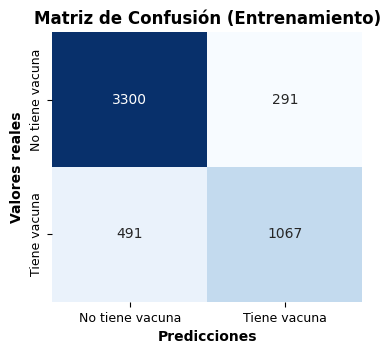

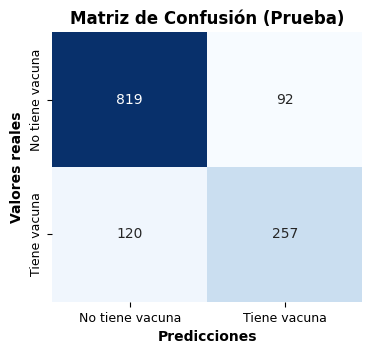

In [ ]:
y_train_pred = model_h1n1_P.predict(X_train)
y_test_pred = model_h1n1_P.predict(X_test)

labels = ['No tiene vacuna', 'Tiene vacuna']

plot_confusion_matrix(y_train, np.round(y_train_pred), labels, title='Matriz de Confusión (Entrenamiento)')

plot_confusion_matrix(y_test, np.round(y_test_pred), labels, title='Matriz de Confusión (Prueba)')

In [ ]:
y_pred = model_h1n1_P.predict(X_test)
print(classification_report(y_test, np.round(y_pred)))

41/41 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0       0.87      0.90      0.89       911
           1       0.74      0.68      0.71       377

    accuracy                           0.84      1288
   macro avg       0.80      0.79      0.80      1288
weighted avg       0.83      0.84      0.83      1288



#### *Modelo 3*

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model_h1n1_P2 = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(128, activation='sigmoid'),
    layers.Dense(1, activation='sigmoid')
])

model_h1n1_P2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model_h1n1_P2.fit(X_train, y_train, epochs=15, batch_size=64, validation_data=(X_test, y_test))

loss, accuracy = model_h1n1_P2.evaluate(X_test, y_test)
print(f'Pérdida: {loss:.2f}, Accuracy: {accuracy*100:.2f}%')

Epoch 1/15
81/81 [==============================] - 2s 8ms/step - loss: 0.5146 - accuracy: 0.7267 - val_loss: 0.4072 - val_accuracy: 0.8253
Epoch 2/15
81/81 [==============================] - 0s 4ms/step - loss: 0.4015 - accuracy: 0.8211 - val_loss: 0.3892 - val_accuracy: 0.8315
Epoch 3/15
81/81 [==============================] - 0s 4ms/step - loss: 0.3876 - accuracy: 0.8268 - val_loss: 0.3872 - val_accuracy: 0.8377
Epoch 4/15
81/81 [==============================] - 0s 4ms/step - loss: 0.3819 - accuracy: 0.8330 - val_loss: 0.3876 - val_accuracy: 0.8377
Epoch 5/15
81/81 [==============================] - 0s 4ms/step - loss: 0.3780 - accuracy: 0.8378 - val_loss: 0.3866 - val_accuracy: 0.8354
Epoch 6/15
81/81 [==============================] - 0s 3ms/step - loss: 0.3756 - accuracy: 0.8371 - val_loss: 0.3866 - val_accuracy: 0.8370
Epoch 7/15
81/81 [==============================] - 0s 4ms/step - loss: 0.3726 - accuracy: 0.8374 - val_loss: 0.3885 - val_accuracy: 0.8292
Epoch 8/15
81/81 [==

In [ ]:
y_pred = model_h1n1_P2.predict(X_test)
print(classification_report(y_test, np.round(y_pred)))

41/41 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.87      0.90      0.88       911
           1       0.73      0.66      0.70       377

    accuracy                           0.83      1288
   macro avg       0.80      0.78      0.79      1288
weighted avg       0.83      0.83      0.83      1288



#### *Modelo 4*

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model_h1n1_P4 = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(32, activation='sigmoid'),
    layers.Dense(32, activation='sigmoid'),
    layers.Dense(1, activation='sigmoid')
])

model_h1n1_P4.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model_h1n1_P4.fit(X_train, y_train, epochs=15, batch_size=64, validation_data=(X_test, y_test))

loss, accuracy = model_h1n1_P4.evaluate(X_test, y_test)
print(f'Pérdida: {loss:.2f}, Accuracy: {accuracy*100:.2f}%')

Epoch 1/15
81/81 [==============================] - 1s 6ms/step - loss: 0.5727 - accuracy: 0.6999 - val_loss: 0.4983 - val_accuracy: 0.7337
Epoch 2/15
81/81 [==============================] - 0s 3ms/step - loss: 0.4584 - accuracy: 0.7922 - val_loss: 0.4153 - val_accuracy: 0.8230
Epoch 3/15
81/81 [==============================] - 0s 4ms/step - loss: 0.4082 - accuracy: 0.8186 - val_loss: 0.3938 - val_accuracy: 0.8354
Epoch 4/15
81/81 [==============================] - 0s 4ms/step - loss: 0.3903 - accuracy: 0.8277 - val_loss: 0.3857 - val_accuracy: 0.8354
Epoch 5/15
81/81 [==============================] - 0s 4ms/step - loss: 0.3814 - accuracy: 0.8330 - val_loss: 0.3846 - val_accuracy: 0.8362
Epoch 6/15
81/81 [==============================] - 0s 4ms/step - loss: 0.3761 - accuracy: 0.8384 - val_loss: 0.3849 - val_accuracy: 0.8331
Epoch 7/15
81/81 [==============================] - 0s 4ms/step - loss: 0.3737 - accuracy: 0.8378 - val_loss: 0.3868 - val_accuracy: 0.8331
Epoch 8/15
81/81 [==

In [ ]:
y_pred = model_h1n1_P4.predict(X_test)
print(classification_report(y_test, np.round(y_pred)))

41/41 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0       0.88      0.88      0.88       911
           1       0.71      0.71      0.71       377

    accuracy                           0.83      1288
   macro avg       0.80      0.79      0.80      1288
weighted avg       0.83      0.83      0.83      1288



#### *Modelo 5*

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model_h1n1_P5 = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(64, activation='sigmoid'),
    layers.Dense(32, activation='sigmoid'),
    layers.Dense(1, activation='sigmoid')
])

model_h1n1_P5.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model_h1n1_P5.fit(X_train, y_train, epochs=15, batch_size=64, validation_data=(X_test, y_test))

loss, accuracy = model_h1n1_P5.evaluate(X_test, y_test)
print(f'Pérdida: {loss:.2f}, Accuracy: {accuracy*100:.2f}%')

Epoch 1/15
81/81 [==============================] - 2s 9ms/step - loss: 0.5451 - accuracy: 0.7314 - val_loss: 0.4605 - val_accuracy: 0.7888
Epoch 2/15
81/81 [==============================] - 0s 5ms/step - loss: 0.4294 - accuracy: 0.8068 - val_loss: 0.4031 - val_accuracy: 0.8307
Epoch 3/15
81/81 [==============================] - 0s 3ms/step - loss: 0.3971 - accuracy: 0.8225 - val_loss: 0.3894 - val_accuracy: 0.8354
Epoch 4/15
81/81 [==============================] - 0s 3ms/step - loss: 0.3846 - accuracy: 0.8289 - val_loss: 0.3857 - val_accuracy: 0.8339
Epoch 5/15
81/81 [==============================] - 0s 4ms/step - loss: 0.3779 - accuracy: 0.8332 - val_loss: 0.3861 - val_accuracy: 0.8315
Epoch 6/15
81/81 [==============================] - 0s 4ms/step - loss: 0.3741 - accuracy: 0.8374 - val_loss: 0.3873 - val_accuracy: 0.8307
Epoch 7/15
81/81 [==============================] - 0s 4ms/step - loss: 0.3719 - accuracy: 0.8376 - val_loss: 0.3875 - val_accuracy: 0.8323
Epoch 8/15
81/81 [==

In [ ]:
y_pred = model_h1n1_P5.predict(X_test)
print(classification_report(y_test, np.round(y_pred)))

41/41 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.88      0.88      0.88       911
           1       0.70      0.71      0.70       377

    accuracy                           0.83      1288
   macro avg       0.79      0.79      0.79      1288
weighted avg       0.83      0.83      0.83      1288



#### *Modelo 6*

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model_h1n1_P6 = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(64, activation='sigmoid'),
    layers.Dense(64, activation='sigmoid'),
    layers.Dense(1, activation='sigmoid')
])

model_h1n1_P6.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model_h1n1_P6.fit(X_train, y_train, epochs=15, batch_size=64, validation_data=(X_test, y_test))

loss, accuracy = model_h1n1_P6.evaluate(X_test, y_test)
print(f'Pérdida: {loss:.2f}, Accuracy: {accuracy*100:.2f}%')

Epoch 1/15
81/81 [==============================] - 1s 5ms/step - loss: 0.5372 - accuracy: 0.7302 - val_loss: 0.4513 - val_accuracy: 0.8106
Epoch 2/15
81/81 [==============================] - 0s 4ms/step - loss: 0.4208 - accuracy: 0.8118 - val_loss: 0.3987 - val_accuracy: 0.8315
Epoch 3/15
81/81 [==============================] - 0s 4ms/step - loss: 0.3923 - accuracy: 0.8272 - val_loss: 0.3884 - val_accuracy: 0.8354
Epoch 4/15
81/81 [==============================] - 0s 4ms/step - loss: 0.3817 - accuracy: 0.8299 - val_loss: 0.3935 - val_accuracy: 0.8238
Epoch 5/15
81/81 [==============================] - 0s 3ms/step - loss: 0.3773 - accuracy: 0.8355 - val_loss: 0.3876 - val_accuracy: 0.8269
Epoch 6/15
81/81 [==============================] - 0s 4ms/step - loss: 0.3743 - accuracy: 0.8369 - val_loss: 0.3869 - val_accuracy: 0.8346
Epoch 7/15
81/81 [==============================] - 0s 4ms/step - loss: 0.3711 - accuracy: 0.8392 - val_loss: 0.3902 - val_accuracy: 0.8292
Epoch 8/15
81/81 [==

In [ ]:
y_pred = model_h1n1_P6.predict(X_test)
print(classification_report(y_test, np.round(y_pred)))

41/41 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0       0.87      0.89      0.88       911
           1       0.72      0.69      0.70       377

    accuracy                           0.83      1288
   macro avg       0.80      0.79      0.79      1288
weighted avg       0.83      0.83      0.83      1288



#### *Modelo 7*

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model_h1n1_P7= keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(64, activation='sigmoid'),
    layers.Dense(64, activation='sigmoid'),
    layers.Dense(128, activation='sigmoid'),
    layers.Dense(1, activation='sigmoid')
])

model_h1n1_P7.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model_h1n1_P7.fit(X_train, y_train, epochs=15, batch_size=64, validation_data=(X_test, y_test))

loss, accuracy = model_h1n1_P7.evaluate(X_test, y_test)
print(f'Pérdida: {loss:.2f}, Accuracy: {accuracy*100:.2f}%')

Epoch 1/15
81/81 [==============================] - 2s 9ms/step - loss: 0.6086 - accuracy: 0.6759 - val_loss: 0.5317 - val_accuracy: 0.7073
Epoch 2/15
81/81 [==============================] - 1s 7ms/step - loss: 0.4495 - accuracy: 0.7908 - val_loss: 0.4029 - val_accuracy: 0.8300
Epoch 3/15
81/81 [==============================] - 0s 4ms/step - loss: 0.3959 - accuracy: 0.8238 - val_loss: 0.3925 - val_accuracy: 0.8269
Epoch 4/15
81/81 [==============================] - 0s 4ms/step - loss: 0.3829 - accuracy: 0.8332 - val_loss: 0.3911 - val_accuracy: 0.8315
Epoch 5/15
81/81 [==============================] - 0s 4ms/step - loss: 0.3788 - accuracy: 0.8324 - val_loss: 0.3919 - val_accuracy: 0.8315
Epoch 6/15
81/81 [==============================] - 0s 4ms/step - loss: 0.3752 - accuracy: 0.8396 - val_loss: 0.3884 - val_accuracy: 0.8307
Epoch 7/15
81/81 [==============================] - 0s 4ms/step - loss: 0.3718 - accuracy: 0.8400 - val_loss: 0.3921 - val_accuracy: 0.8323
Epoch 8/15
81/81 [==

In [ ]:
y_pred = model_h1n1_P7.predict(X_test)
print(classification_report(y_test, np.round(y_pred)))

41/41 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.86      0.92      0.89       911
           1       0.76      0.65      0.70       377

    accuracy                           0.84      1288
   macro avg       0.81      0.78      0.80      1288
weighted avg       0.83      0.84      0.83      1288



## Entrenamiento y Prueba del Modelo - Vacuna Seasonal

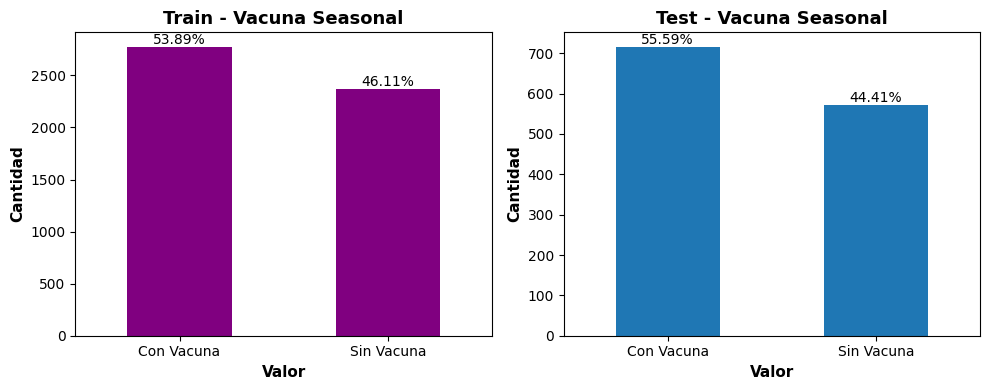

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

axs[0].set_title('Train - Vacuna Seasonal', fontsize=13, fontweight='bold')
value_train_seasonal = y_train.value_counts()
y_train.value_counts().plot(kind='bar', ax=axs[0], color = 'purple')
axs[0].set_xlabel('Valor', fontsize=11, fontweight='bold')
axs[0].set_ylabel('Cantidad', fontsize=11, fontweight='bold')
etiquetas_seasonal = ['Con Vacuna', 'Sin Vacuna']
valores_seasonal = [0, 1]
axs[0].set_xticks(valores_seasonal)
axs[0].set_xticklabels(etiquetas_seasonal, rotation=0)

for i, v in enumerate(value_train_seasonal):
    axs[0].text(i, v, f"{(v / len(y_train) * 100):.2f}%", ha='center', va='bottom')

axs[1].set_title('Test - Vacuna Seasonal', fontsize=13, fontweight='bold')
value_test_seasonal = y_test.value_counts()
y_test.value_counts().plot(kind='bar', ax=axs[1])
axs[1].set_xlabel('Valor', fontsize=11, fontweight='bold')
axs[1].set_ylabel('Cantidad', fontsize=11, fontweight='bold')
axs[1].set_xticks(valores_seasonal)
axs[1].set_xticklabels(etiquetas_seasonal, rotation=0)

for i, v in enumerate(value_test_seasonal):
    axs[1].text(i, v, f"{(v / len(y_test) * 100):.2f}%", ha='center', va='bottom')

plt.tight_layout()
plt.show()

### Variación de Parámetros

#### *Modelo 1*

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model_s1 = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(32, activation='sigmoid'),
    layers.Dense(1, activation='sigmoid')
])

model_s1.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

model_s1.fit(X_train, y_train, epochs = 15, batch_size = 64, validation_data=(X_test, y_test))

loss, accuracy = model_s1.evaluate(X_test, y_test)
print(f'Pérdida: {loss:.2f}, Precisión: {accuracy*100:.2f}%')

Epoch 1/15
81/81 [==============================] - 2s 9ms/step - loss: 0.5808 - accuracy: 0.7114 - val_loss: 0.4947 - val_accuracy: 0.7865
Epoch 2/15
81/81 [==============================] - 0s 5ms/step - loss: 0.4889 - accuracy: 0.7737 - val_loss: 0.4552 - val_accuracy: 0.7950
Epoch 3/15
81/81 [==============================] - 0s 4ms/step - loss: 0.4593 - accuracy: 0.7924 - val_loss: 0.4410 - val_accuracy: 0.8028
Epoch 4/15
81/81 [==============================] - 0s 5ms/step - loss: 0.4453 - accuracy: 0.7984 - val_loss: 0.4338 - val_accuracy: 0.8012
Epoch 5/15
81/81 [==============================] - 0s 5ms/step - loss: 0.4374 - accuracy: 0.8035 - val_loss: 0.4293 - val_accuracy: 0.8012
Epoch 6/15
81/81 [==============================] - 0s 6ms/step - loss: 0.4317 - accuracy: 0.8052 - val_loss: 0.4295 - val_accuracy: 0.8067
Epoch 7/15
81/81 [==============================] - 0s 4ms/step - loss: 0.4292 - accuracy: 0.8068 - val_loss: 0.4278 - val_accuracy: 0.8043
Epoch 8/15
81/81 [==

In [ ]:
y_pred = model_s1.predict(X_train)
print(classification_report(y_train, np.round(y_pred)))

161/161 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.81      0.85      0.83      2775
           1       0.81      0.77      0.79      2374

    accuracy                           0.81      5149
   macro avg       0.81      0.81      0.81      5149
weighted avg       0.81      0.81      0.81      5149



#### *Modelo 2*

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model_s2 = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(64, activation='sigmoid'),
    layers.Dense(1, activation='sigmoid')
])

model_s2.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

model_s2.fit(X_train, y_train, epochs = 15, batch_size = 64, validation_data=(X_test, y_test))

loss, accuracy = model_s2.evaluate(X_test, y_test)
print(f'Pérdida: {loss:.2f}, Precisión: {accuracy*100:.2f}%')

Epoch 1/15
81/81 [==============================] - 1s 5ms/step - loss: 0.5635 - accuracy: 0.7236 - val_loss: 0.4777 - val_accuracy: 0.7803
Epoch 2/15
81/81 [==============================] - 0s 3ms/step - loss: 0.4734 - accuracy: 0.7856 - val_loss: 0.4450 - val_accuracy: 0.7935
Epoch 3/15
81/81 [==============================] - 0s 4ms/step - loss: 0.4494 - accuracy: 0.7974 - val_loss: 0.4342 - val_accuracy: 0.7981
Epoch 4/15
81/81 [==============================] - 0s 4ms/step - loss: 0.4398 - accuracy: 0.8015 - val_loss: 0.4309 - val_accuracy: 0.8028
Epoch 5/15
81/81 [==============================] - 0s 4ms/step - loss: 0.4339 - accuracy: 0.8035 - val_loss: 0.4276 - val_accuracy: 0.8067
Epoch 6/15
81/81 [==============================] - 0s 4ms/step - loss: 0.4300 - accuracy: 0.8070 - val_loss: 0.4235 - val_accuracy: 0.8098
Epoch 7/15
81/81 [==============================] - 0s 3ms/step - loss: 0.4272 - accuracy: 0.8060 - val_loss: 0.4300 - val_accuracy: 0.8051
Epoch 8/15
81/81 [==

In [ ]:
y_pred = model_s2.predict(X_train)
print(classification_report(y_train, np.round(y_pred)))

161/161 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.82      0.85      0.83      2775
           1       0.82      0.77      0.80      2374

    accuracy                           0.82      5149
   macro avg       0.82      0.81      0.82      5149
weighted avg       0.82      0.82      0.82      5149



#### *Modelo 3*

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model_s3 = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(128, activation='sigmoid'),
    layers.Dense(1, activation='sigmoid')
])

model_s3.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

model_s3.fit(X_train, y_train, epochs = 15, batch_size = 64, validation_data=(X_test, y_test))

loss, accuracy = model_s3.evaluate(X_test, y_test)
print(f'Pérdida: {loss:.2f}, Precisión: {accuracy*100:.2f}%')

Epoch 1/15
81/81 [==============================] - 2s 8ms/step - loss: 0.5696 - accuracy: 0.7007 - val_loss: 0.4656 - val_accuracy: 0.7849
Epoch 2/15
81/81 [==============================] - 0s 5ms/step - loss: 0.4623 - accuracy: 0.7922 - val_loss: 0.4392 - val_accuracy: 0.7989
Epoch 3/15
81/81 [==============================] - 0s 5ms/step - loss: 0.4440 - accuracy: 0.8007 - val_loss: 0.4294 - val_accuracy: 0.8090
Epoch 4/15
81/81 [==============================] - 0s 5ms/step - loss: 0.4362 - accuracy: 0.8023 - val_loss: 0.4287 - val_accuracy: 0.8028
Epoch 5/15
81/81 [==============================] - 0s 5ms/step - loss: 0.4329 - accuracy: 0.8073 - val_loss: 0.4273 - val_accuracy: 0.8082
Epoch 6/15
81/81 [==============================] - 0s 5ms/step - loss: 0.4301 - accuracy: 0.8077 - val_loss: 0.4224 - val_accuracy: 0.8106
Epoch 7/15
81/81 [==============================] - 0s 5ms/step - loss: 0.4277 - accuracy: 0.8033 - val_loss: 0.4336 - val_accuracy: 0.7974
Epoch 8/15
81/81 [==

In [ ]:
y_pred = model_s3.predict(X_train)
print(classification_report(y_train, np.round(y_pred)))

161/161 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.81      0.85      0.83      2775
           1       0.82      0.77      0.79      2374

    accuracy                           0.81      5149
   macro avg       0.82      0.81      0.81      5149
weighted avg       0.82      0.81      0.81      5149



#### *Modelo 4*

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model_s4 = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(32, activation='sigmoid'),
    layers.Dense(32, activation='sigmoid'),
    layers.Dense(1, activation='sigmoid')
])

model_s4.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

model_s4.fit(X_train, y_train, epochs = 15, batch_size = 64, validation_data=(X_test, y_test))

loss, accuracy = model_s4.evaluate(X_test, y_test)
print(f'Pérdida: {loss:.2f}, Precisión: {accuracy*100:.2f}%')

Epoch 1/15
81/81 [==============================] - 1s 5ms/step - loss: 0.6348 - accuracy: 0.6741 - val_loss: 0.5498 - val_accuracy: 0.7585
Epoch 2/15
81/81 [==============================] - 0s 4ms/step - loss: 0.5161 - accuracy: 0.7652 - val_loss: 0.4615 - val_accuracy: 0.7857
Epoch 3/15
81/81 [==============================] - 0s 3ms/step - loss: 0.4623 - accuracy: 0.7914 - val_loss: 0.4398 - val_accuracy: 0.7958
Epoch 4/15
81/81 [==============================] - 0s 4ms/step - loss: 0.4443 - accuracy: 0.8011 - val_loss: 0.4342 - val_accuracy: 0.8005
Epoch 5/15
81/81 [==============================] - 0s 4ms/step - loss: 0.4354 - accuracy: 0.8042 - val_loss: 0.4329 - val_accuracy: 0.7997
Epoch 6/15
81/81 [==============================] - 0s 3ms/step - loss: 0.4321 - accuracy: 0.8075 - val_loss: 0.4297 - val_accuracy: 0.8036
Epoch 7/15
81/81 [==============================] - 0s 3ms/step - loss: 0.4280 - accuracy: 0.8089 - val_loss: 0.4288 - val_accuracy: 0.8036
Epoch 8/15
81/81 [==

In [ ]:
y_pred = model_s4.predict(X_train)
print(classification_report(y_train, np.round(y_pred)))

161/161 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.83      0.83      0.83      2775
           1       0.80      0.80      0.80      2374

    accuracy                           0.82      5149
   macro avg       0.82      0.82      0.82      5149
weighted avg       0.82      0.82      0.82      5149



#### *Modelo 5*

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model_s5 = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(64, activation='sigmoid'),
    layers.Dense(32, activation='sigmoid'),
    layers.Dense(1, activation='sigmoid')
])

model_s5.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

model_s5.fit(X_train, y_train, epochs = 15, batch_size = 64, validation_data=(X_test, y_test))

loss, accuracy = model_s5.evaluate(X_test, y_test)
print(f'Pérdida: {loss:.2f}, Precisión: {accuracy*100:.2f}%')

Epoch 1/15
81/81 [==============================] - 2s 9ms/step - loss: 0.6248 - accuracy: 0.6625 - val_loss: 0.5274 - val_accuracy: 0.7702
Epoch 2/15
81/81 [==============================] - 0s 5ms/step - loss: 0.4976 - accuracy: 0.7739 - val_loss: 0.4522 - val_accuracy: 0.7935
Epoch 3/15
81/81 [==============================] - 0s 5ms/step - loss: 0.4551 - accuracy: 0.7947 - val_loss: 0.4348 - val_accuracy: 0.8012
Epoch 4/15
81/81 [==============================] - 0s 5ms/step - loss: 0.4398 - accuracy: 0.8040 - val_loss: 0.4315 - val_accuracy: 0.8036
Epoch 5/15
81/81 [==============================] - 0s 5ms/step - loss: 0.4336 - accuracy: 0.8052 - val_loss: 0.4306 - val_accuracy: 0.8075
Epoch 6/15
81/81 [==============================] - 1s 7ms/step - loss: 0.4291 - accuracy: 0.8044 - val_loss: 0.4287 - val_accuracy: 0.8090
Epoch 7/15
81/81 [==============================] - 0s 6ms/step - loss: 0.4281 - accuracy: 0.8077 - val_loss: 0.4280 - val_accuracy: 0.8082
Epoch 8/15
81/81 [==

In [ ]:
y_pred = model_s5.predict(X_train)
print(classification_report(y_train, np.round(y_pred)))

161/161 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.82      0.85      0.84      2775
           1       0.82      0.78      0.80      2374

    accuracy                           0.82      5149
   macro avg       0.82      0.82      0.82      5149
weighted avg       0.82      0.82      0.82      5149



#### *Modelo 6*

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model_s6 = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(64, activation='sigmoid'),
    layers.Dense(64, activation='sigmoid'),
    layers.Dense(1, activation='sigmoid')
])

model_s6.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

model_s6.fit(X_train, y_train, epochs = 15, batch_size = 64, validation_data=(X_test, y_test))

loss, accuracy = model_s6.evaluate(X_test, y_test)
print(f'Pérdida: {loss:.2f}, Precisión: {accuracy*100:.2f}%')

Epoch 1/15
81/81 [==============================] - 1s 6ms/step - loss: 0.6040 - accuracy: 0.6955 - val_loss: 0.4964 - val_accuracy: 0.7780
Epoch 2/15
81/81 [==============================] - 0s 4ms/step - loss: 0.4755 - accuracy: 0.7835 - val_loss: 0.4418 - val_accuracy: 0.7974
Epoch 3/15
81/81 [==============================] - 0s 4ms/step - loss: 0.4455 - accuracy: 0.8015 - val_loss: 0.4318 - val_accuracy: 0.8075
Epoch 4/15
81/81 [==============================] - 0s 4ms/step - loss: 0.4355 - accuracy: 0.8021 - val_loss: 0.4288 - val_accuracy: 0.8098
Epoch 5/15
81/81 [==============================] - 0s 4ms/step - loss: 0.4314 - accuracy: 0.8050 - val_loss: 0.4276 - val_accuracy: 0.8106
Epoch 6/15
81/81 [==============================] - 0s 4ms/step - loss: 0.4283 - accuracy: 0.8068 - val_loss: 0.4265 - val_accuracy: 0.8082
Epoch 7/15
81/81 [==============================] - 0s 4ms/step - loss: 0.4253 - accuracy: 0.8048 - val_loss: 0.4289 - val_accuracy: 0.8043
Epoch 8/15
81/81 [==

In [ ]:
y_pred = model_s6.predict(X_train)
print(classification_report(y_train, np.round(y_pred)))

161/161 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.81      0.86      0.83      2775
           1       0.82      0.77      0.79      2374

    accuracy                           0.82      5149
   macro avg       0.82      0.81      0.81      5149
weighted avg       0.82      0.82      0.82      5149



41/41 [==============================] - 0s 2ms/step


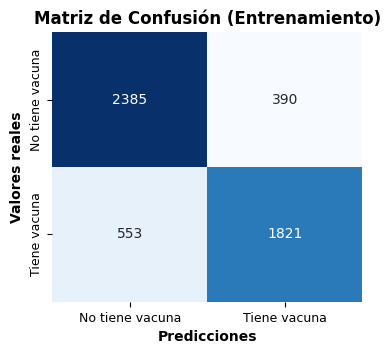

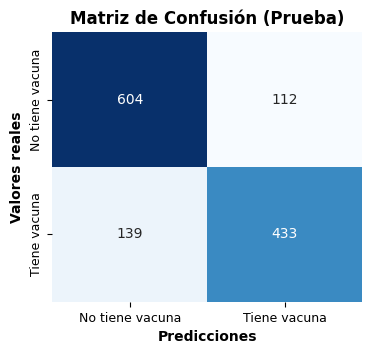

In [ ]:
y_train_pred = model_s6.predict(X_train)
y_test_pred = model_s6.predict(X_test)

labels = ['No tiene vacuna', 'Tiene vacuna']

plot_confusion_matrix(y_train, np.round(y_train_pred), labels, title='Matriz de Confusión (Entrenamiento)')

plot_confusion_matrix(y_test, np.round(y_test_pred), labels, title='Matriz de Confusión (Prueba)')

#### *Modelo 7*

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model_s7 = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(64, activation='sigmoid'),
    layers.Dense(64, activation='sigmoid'),
    layers.Dense(64, activation='sigmoid'),
    layers.Dense(1, activation='sigmoid')
])

model_s7.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

model_s7.fit(X_train, y_train, epochs = 15, batch_size = 64, validation_data=(X_test, y_test))

loss, accuracy = model_s7.evaluate(X_test, y_test)
print(f'Pérdida: {loss:.2f}, Precisión: {accuracy*100:.2f}%')

Epoch 1/15
81/81 [==============================] - 1s 6ms/step - loss: 0.6455 - accuracy: 0.6337 - val_loss: 0.5319 - val_accuracy: 0.7585
Epoch 2/15
81/81 [==============================] - 0s 4ms/step - loss: 0.4870 - accuracy: 0.7749 - val_loss: 0.4463 - val_accuracy: 0.8005
Epoch 3/15
81/81 [==============================] - 0s 4ms/step - loss: 0.4482 - accuracy: 0.8011 - val_loss: 0.4352 - val_accuracy: 0.8036
Epoch 4/15
81/81 [==============================] - 0s 4ms/step - loss: 0.4398 - accuracy: 0.8023 - val_loss: 0.4407 - val_accuracy: 0.8012
Epoch 5/15
81/81 [==============================] - 0s 4ms/step - loss: 0.4333 - accuracy: 0.8081 - val_loss: 0.4384 - val_accuracy: 0.7989
Epoch 6/15
81/81 [==============================] - 0s 4ms/step - loss: 0.4320 - accuracy: 0.8056 - val_loss: 0.4320 - val_accuracy: 0.8036
Epoch 7/15
81/81 [==============================] - 0s 4ms/step - loss: 0.4291 - accuracy: 0.8097 - val_loss: 0.4306 - val_accuracy: 0.8036
Epoch 8/15
81/81 [==

In [ ]:
y_pred = model_s7.predict(X_train)
print(classification_report(y_train, np.round(y_pred)))

161/161 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.83      0.84      0.84      2775
           1       0.81      0.80      0.81      2374

    accuracy                           0.82      5149
   macro avg       0.82      0.82      0.82      5149
weighted avg       0.82      0.82      0.82      5149



## **CrossValidation**


In [ ]:
X_train_h1n1, X_test_h1n1, y_train_h1n1, y_test_h1n1 = train_test_split(data, label_h1n1, test_size=0.2, random_state=42)

In [ ]:
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(data, label_seasonal, test_size=0.2, random_state=42)

In [ ]:
model_s6

In [ ]:
model_h1n1_P

In [ ]:
y_train_h1n1 = y_train_h1n1.to_numpy()
y_train_s = y_train_s.to_numpy()

### **H1N1**

In [ ]:
# Diferentes valores de num_folds para la validación cruzada
num_folds_values = [4]

In [ ]:
from sklearn.model_selection import StratifiedKFold

# Preprocesamiento de datos: normalización
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_h1n1)


# Diccionario para almacenar los resultados
results = {}

for num_folds in num_folds_values:

    X_train = scaler.fit_transform(X_train_h1n1)
    X_test = scaler.transform(X_test_h1n1)

    # MODELO 2
    model_h1n1_P = keras.Sequential([
        layers.Input(shape=(X_train_h1n1.shape[1],)),
        layers.Dense(64, activation='sigmoid'),
        layers.Dense(1, activation='sigmoid')
    ])

    model_h1n1_P.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    model_h1n1_P.fit(X_train_h1n1, y_train_h1n1, epochs=15, batch_size=64, validation_data=(X_test_h1n1, y_test_h1n1))
    # Configurar validación cruzada estratificada
    kf = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

    # Listas para almacenar los puntajes de accuracy
    acc_scores = []
    # Realizar validación cruzada
    for train_index, val_index in kf.split(X_train_scaled, y_train_h1n1):
        X_train_fold, X_val_fold = X_train_scaled[train_index], X_train_scaled[val_index]
        y_train_fold, y_val_fold = y_train_h1n1[train_index], y_train_h1n1[val_index]


        # Entrenar el modelo
        model_h1n1_P.fit(X_train_fold, y_train_fold, epochs=10, batch_size=32, verbose=1)

        # Evaluar el modelo en el conjunto de validación
        val_loss, val_acc = model_h1n1_P.evaluate(X_val_fold, y_val_fold, verbose=0)
        acc_scores.append(val_acc)

    # Calcular el promedio de los puntajes de accuracy
    average_acc = np.mean(acc_scores)
    results[num_folds] = average_acc

# Imprimir resultados para comparación
for num_folds, acc in results.items():
  print(f'Accuracy promedio en {num_folds} folds: {acc}')

Epoch 1/15
81/81 [==============================] - 1s 6ms/step - loss: 0.5407 - accuracy: 0.7310 - val_loss: 0.4749 - val_accuracy: 0.7974
Epoch 2/15
81/81 [==============================] - 0s 3ms/step - loss: 0.4523 - accuracy: 0.7994 - val_loss: 0.4271 - val_accuracy: 0.7997
Epoch 3/15
81/81 [==============================] - 0s 4ms/step - loss: 0.4218 - accuracy: 0.8110 - val_loss: 0.4068 - val_accuracy: 0.8222
Epoch 4/15
81/81 [==============================] - 0s 3ms/step - loss: 0.4060 - accuracy: 0.8194 - val_loss: 0.3973 - val_accuracy: 0.8276
Epoch 5/15
81/81 [==============================] - 0s 4ms/step - loss: 0.3968 - accuracy: 0.8233 - val_loss: 0.3917 - val_accuracy: 0.8307
Epoch 6/15
81/81 [==============================] - 0s 3ms/step - loss: 0.3910 - accuracy: 0.8254 - val_loss: 0.3994 - val_accuracy: 0.8300
Epoch 7/15
81/81 [==============================] - 0s 3ms/step - loss: 0.3877 - accuracy: 0.8314 - val_loss: 0.3843 - val_accuracy: 0.8315
Epoch 8/15
81/81 [==

41/41 [==============================] - 0s 2ms/step


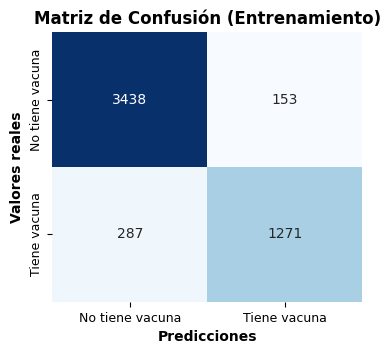

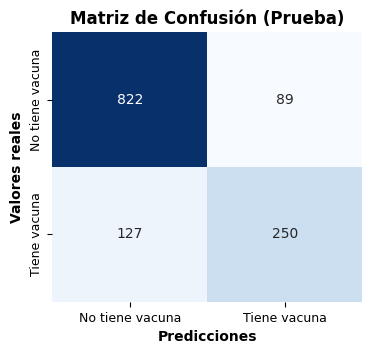

In [ ]:
y_train_pred = model_h1n1_P.predict(X_train)
y_test_pred = model_h1n1_P.predict(X_test)

labels = ['No tiene vacuna', 'Tiene vacuna']

plot_confusion_matrix(y_train_h1n1, np.round(y_train_pred), labels, title='Matriz de Confusión (Entrenamiento)')

plot_confusion_matrix(y_test_h1n1, np.round(y_test_pred), labels, title='Matriz de Confusión (Prueba)')


### **Seasonal**

In [ ]:
num_folds_values = [4]

In [ ]:
from sklearn.model_selection import StratifiedKFold

# Preprocesamiento de datos: normalización
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_s)


# Diccionario para almacenar los resultados
results = {}

for num_folds in num_folds_values:

    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train_s)
    X_test = scaler.transform(X_test_s)

    # MODELO 6
    model_s6 = keras.Sequential([
        layers.Input(shape=(X_train_s.shape[1],)),
        layers.Dense(64, activation='sigmoid'),
        layers.Dense(64, activation='sigmoid'),
        layers.Dense(1, activation='sigmoid')
    ])

    model_s6.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

    model_s6.fit(X_train_s, y_train_s, epochs = 15, batch_size = 64, validation_data=(X_test_s, y_test_s))

    # Configurar validación cruzada estratificada
    kf = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

    # Listas para almacenar los puntajes de accuracy
    acc_scores = []
    # Realizar validación cruzada
    for train_index, val_index in kf.split(X_train_scaled, y_train_s):
        X_train_fold, X_val_fold = X_train_scaled[train_index], X_train_scaled[val_index]
        y_train_fold, y_val_fold = y_train_s[train_index], y_train_s[val_index]


        # Entrenar el modelo
        model_s6.fit(X_train_fold, y_train_fold, epochs=10, batch_size=32, verbose=1)

        # Evaluar el modelo en el conjunto de validación
        val_loss, val_acc = model_s6.evaluate(X_val_fold, y_val_fold, verbose=0)
        acc_scores.append(val_acc)

    # Calcular el promedio de los puntajes de accuracy
    average_acc = np.mean(acc_scores)
    results[num_folds] = average_acc

# Imprimir resultados para comparación
for num_folds, acc in results.items():
  print(f'Accuracy promedio en {num_folds} folds: {acc}')

Epoch 1/15
81/81 [==============================] - 1s 6ms/step - loss: 0.6582 - accuracy: 0.6230 - val_loss: 0.5891 - val_accuracy: 0.7562
Epoch 2/15
81/81 [==============================] - 0s 3ms/step - loss: 0.5374 - accuracy: 0.7497 - val_loss: 0.4939 - val_accuracy: 0.7671
Epoch 3/15
81/81 [==============================] - 0s 4ms/step - loss: 0.4805 - accuracy: 0.7782 - val_loss: 0.4541 - val_accuracy: 0.7958
Epoch 4/15
81/81 [==============================] - 0s 4ms/step - loss: 0.4580 - accuracy: 0.7924 - val_loss: 0.4374 - val_accuracy: 0.7958
Epoch 5/15
81/81 [==============================] - 0s 4ms/step - loss: 0.4484 - accuracy: 0.8000 - val_loss: 0.4317 - val_accuracy: 0.8028
Epoch 6/15
81/81 [==============================] - 0s 3ms/step - loss: 0.4415 - accuracy: 0.8009 - val_loss: 0.4283 - val_accuracy: 0.8059
Epoch 7/15
81/81 [==============================] - 0s 4ms/step - loss: 0.4383 - accuracy: 0.8013 - val_loss: 0.4412 - val_accuracy: 0.7943
Epoch 8/15
81/81 [==

41/41 [==============================] - 0s 2ms/step


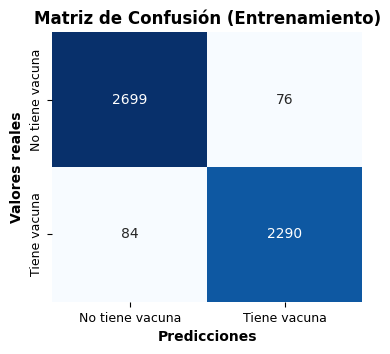

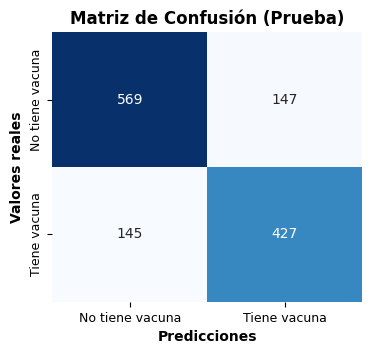

In [ ]:
y_train_pred = model_s6.predict(X_train)
y_test_pred = model_s6.predict(X_test)

labels = ['No tiene vacuna', 'Tiene vacuna']

plot_confusion_matrix(y_train_s, np.round(y_train_pred), labels, title='Matriz de Confusión (Entrenamiento)')

plot_confusion_matrix(y_test_s, np.round(y_test_pred), labels, title='Matriz de Confusión (Prueba)')


# SVM - h1n1


Manteniendo la configuración de validación cruzada estratificada anterior se implementa el SVM


In [ ]:
num_folds_values = [4]

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

# Preprocesamiento de datos: normalización
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_h1n1)

# Definir el espacio de búsqueda de hiperparámetros
param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf', 'poly']}

# Crear el modelo SVM
svm_model = SVC()

# Configurar la búsqueda de hiperparámetros
grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='accuracy')

# Realizar la búsqueda en el conjunto de datos
grid_search.fit(X_train_scaled, y_train_h1n1)

# Imprimir los mejores parámetros encontrados
print("Mejores parámetros:", grid_search.best_params_)

# Obtener el modelo con los mejores parámetros
best_svm_model = grid_search.best_estimator_


Mejores parámetros: {'C': 0.1, 'kernel': 'linear'}


In [ ]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
import numpy as np

# Preprocesamiento de datos: normalización
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_h1n1)

# Configurar modelo SVM
model_svm = SVC(kernel='linear', C=0.1)

# Configurar validación cruzada
kf = KFold(n_splits=num_folds_values[-1], shuffle=True, random_state=42)

# Realizar validación cruzada y almacenar resultados
for num_folds in num_folds_values:
    # Configurar el modelo dentro del bucle
    model_svm = SVC(kernel='linear', C=0.1)

    # Obtener puntajes de validación cruzada
    acc_scores = cross_val_score(model_svm, X_train_scaled, y_train_h1n1, cv=num_folds)

    # Calcular el promedio de los puntajes de accuracy
    average_acc = np.mean(acc_scores)
    results[num_folds] = average_acc

    # Imprimir información relevante
    print(f'Accuracy promedio en {num_folds} folds: {average_acc}')

    # Entrenar el modelo con todos los datos de entrenamiento
    model_svm.fit(X_train_scaled, y_train_h1n1)

    # Hacer predicciones después del entrenamiento
    y_train_pred = model_svm.predict(X_train_scaled)
    y_test_pred = model_svm.predict(X_test_h1n1)

Accuracy promedio en 4 folds: 0.8275423248249335


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


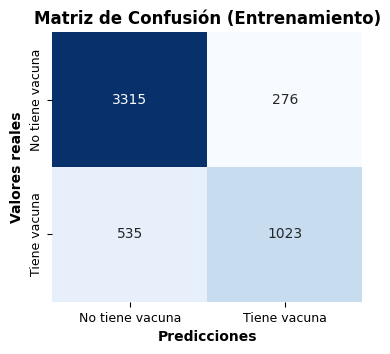

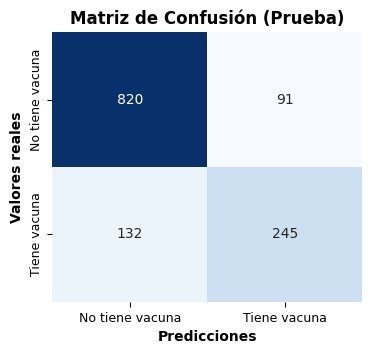

In [ ]:
y_train_pred = model_svm.predict(X_train)
y_test_pred = model_svm.predict(X_test)

labels = ['No tiene vacuna', 'Tiene vacuna']

plot_confusion_matrix(y_train_h1n1, np.round(y_train_pred), labels, title='Matriz de Confusión (Entrenamiento)')

plot_confusion_matrix(y_test_h1n1, np.round(y_test_pred), labels, title='Matriz de Confusión (Prueba)')


# SVM - seasonal


El código utiliza la técnica de búsqueda de hiperparámetros con GridSearchCV en scikit-learn para optimizar un modelo de Máquinas de Soporte Vectorial (SVM). Se normalizan los datos antes de la búsqueda. La búsqueda automática se realiza sobre combinaciones predefinidas de valores para los hiperparámetros C y kernel del SVM.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

# Preprocesamiento de datos: normalización
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_s)

# Definir el espacio de búsqueda de hiperparámetros
param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf', 'poly']}

# Crear el modelo SVM
svm_model = SVC()

# Configurar la búsqueda de hiperparámetros
grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='accuracy')

# Realizar la búsqueda en el conjunto de datos
grid_search.fit(X_train_scaled, y_train_s)

# Imprimir los mejores parámetros encontrados
print("Mejores parámetros:", grid_search.best_params_)

# Obtener el modelo con los mejores parámetros
best_svm_model = grid_search.best_estimator_


Mejores parámetros: {'C': 0.1, 'kernel': 'linear'}


In [ ]:
num_folds_values = [2]

In [ ]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
import numpy as np

# Preprocesamiento de datos: normalización
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_s)

# Configurar modelo SVM
model_svm = SVC(kernel='linear', C=0.1)

# Configurar validación cruzada
kf = KFold(n_splits=num_folds_values[-1], shuffle=True, random_state=42)

# Realizar validación cruzada y almacenar resultados
for num_folds in num_folds_values:
    # Configurar el modelo dentro del bucle
    model_svm = SVC(kernel='linear', C=0.1)

    # Obtener puntajes de validación cruzada
    acc_scores = cross_val_score(model_svm, X_train_scaled, y_train_s, cv=num_folds)

    # Calcular el promedio de los puntajes de accuracy
    average_acc = np.mean(acc_scores)
    results[num_folds] = average_acc

    # Imprimir información relevante
    print(f'Accuracy promedio en {num_folds} folds: {average_acc}')

    # Entrenar el modelo con todos los datos de entrenamiento
    model_svm.fit(X_train_scaled, y_train_s)

    # Hacer predicciones después del entrenamiento
    y_train_pred = model_svm.predict(X_train_scaled)
    y_test_pred = model_svm.predict(X_test_s)


Accuracy promedio en 2 folds: 0.787920353648509


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


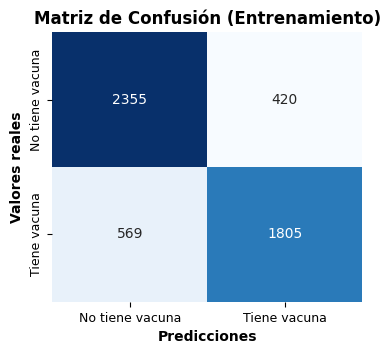

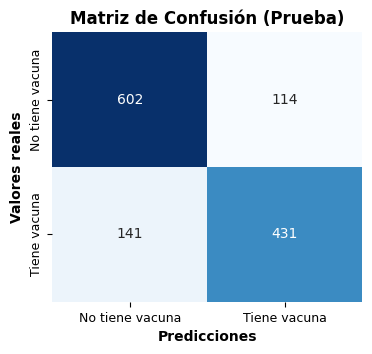

In [ ]:
y_train_pred = model_svm.predict(X_train)
y_test_pred = model_svm.predict(X_test)

labels = ['No tiene vacuna', 'Tiene vacuna']

plot_confusion_matrix(y_train_s, np.round(y_train_pred), labels, title='Matriz de Confusión (Entrenamiento)')

plot_confusion_matrix(y_test_s, np.round(y_test_pred), labels, title='Matriz de Confusión (Prueba)')


# K-means H1N1


In [ ]:
range_n_clusters = [2, 3, 4, 5, 6, 8, 10, 12]

for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters, n_init="auto", random_state=10)
    cluster_labels = clusterer.fit_predict(data)

    silhouette_avg = silhouette_score(data, cluster_labels)

    print(
        "Para n_clusters = ", n_clusters, "El silhouette_score promedio es: ", silhouette_avg)

Para n_clusters =  2 El silhouette_score promedio es:  0.043829532469028314
Para n_clusters =  3 El silhouette_score promedio es:  0.04131098183978317
Para n_clusters =  4 El silhouette_score promedio es:  0.037498309929415254
Para n_clusters =  5 El silhouette_score promedio es:  0.03410491458980139
Para n_clusters =  6 El silhouette_score promedio es:  0.02710187340930334
Para n_clusters =  8 El silhouette_score promedio es:  0.02316491262490492
Para n_clusters =  10 El silhouette_score promedio es:  0.02490016095298307
Para n_clusters =  12 El silhouette_score promedio es:  0.02347291088603118


In [ ]:
kmeans = KMeans(n_clusters=2, n_init=1000, max_iter=100000).fit(X_train)
labels = kmeans.predict(X_train)

clase_a_indice = {clase: [] for clase in set(labels)}

for i, clase in enumerate(labels):
    clase_a_indice[clase].append(i)

y = list(y_train)
clase_a_valores = {clase: [y[i] for i in indices] for clase, indices in clase_a_indice.items()}

frecuencia_por_clase = {}

for clase, valores in clase_a_valores.items():
    total_datos_clase = len(valores)
    frecuencia = {}
    frecuencia_relativa = {}

    for valor in set(valores):
        cantidad = valores.count(valor)
        frecuencia[valor] = cantidad
        frecuencia_relativa[valor] = (cantidad / total_datos_clase) * 100

    frecuencia_por_clase[clase] = (frecuencia, frecuencia_relativa)

print("Frecuencia y frecuencia relativa de cada valor por etiqueta de clúster:")
for clase, (frecuencia, frecuencia_relativa) in frecuencia_por_clase.items():
    print(f"Cluster {clase}:")
    for valor, cant in frecuencia.items():
        frec_rel = frecuencia_relativa[valor]
        print(f"{valor}: Cantidad: {cant}, Frecuencia Relativa: {frec_rel:.2f}%")

Frecuencia y frecuencia relativa de cada valor por etiqueta de clúster:
Cluster 0:
0: Cantidad: 1861, Frecuencia Relativa: 84.98%
1: Cantidad: 329, Frecuencia Relativa: 15.02%
Cluster 1:
0: Cantidad: 1730, Frecuencia Relativa: 58.47%
1: Cantidad: 1229, Frecuencia Relativa: 41.53%


In [ ]:
K = []
fallo = 0
acierto = 0
Num_K = int(input('Cantidad de Clusters correspondientes a H1N1: '))

for i in range(Num_K):
    K.append(int(input('Numero correspondiente al cluster de H1N1: ')))

for i in range(len(labels)):
    if (y[i] == 1) and (labels[i] in K):
        acierto = acierto+1
    elif (y[i] == 0) and not(labels[i] in K):
        acierto = acierto+1
    elif (y[i] == 1) and not(labels[i] in K):
        fallo = fallo+1
    elif (y[i] == 0) and (labels[i] in K):
        fallo = fallo+1

print(f"El error es: {fallo/len(labels)*100:.2f}%")

Cantidad de Clusters correspondientes a H1N1: 1
Numero correspondiente al cluster de H1N1: 1
El error es: 39.99%


In [ ]:
kmeans = KMeans(n_clusters=3, n_init=1000, max_iter=100000).fit(X_train)
labels = kmeans.predict(X_train)

clase_a_indice = {clase: [] for clase in set(labels)}

for i, clase in enumerate(labels):
    clase_a_indice[clase].append(i)

y = list(y_train)
clase_a_valores = {clase: [y[i] for i in indices] for clase, indices in clase_a_indice.items()}

frecuencia_por_clase = {}

for clase, valores in clase_a_valores.items():
    total_datos_clase = len(valores)
    frecuencia = {}
    frecuencia_relativa = {}

    for valor in set(valores):
        cantidad = valores.count(valor)
        frecuencia[valor] = cantidad
        frecuencia_relativa[valor] = (cantidad / total_datos_clase) * 100

    frecuencia_por_clase[clase] = (frecuencia, frecuencia_relativa)

print("Frecuencia y frecuencia relativa de cada valor por etiqueta de clúster:")
for clase, (frecuencia, frecuencia_relativa) in frecuencia_por_clase.items():
    print(f"Cluster {clase}:")
    for valor, cant in frecuencia.items():
        frec_rel = frecuencia_relativa[valor]
        print(f"{valor}: Cantidad: {cant}, Frecuencia Relativa: {frec_rel:.2f}%")

Frecuencia y frecuencia relativa de cada valor por etiqueta de clúster:
Cluster 0:
0: Cantidad: 1132, Frecuencia Relativa: 84.67%
1: Cantidad: 205, Frecuencia Relativa: 15.33%
Cluster 1:
0: Cantidad: 1208, Frecuencia Relativa: 72.86%
1: Cantidad: 450, Frecuencia Relativa: 27.14%
Cluster 2:
0: Cantidad: 1251, Frecuencia Relativa: 58.08%
1: Cantidad: 903, Frecuencia Relativa: 41.92%


In [ ]:
K = []
fallo = 0
acierto = 0
Num_K = int(input('Cantidad de Clusters correspondientes a H1N1: '))

for i in range(Num_K):
    K.append(int(input('Numero correspondiente al cluster de H1N1: ')))

for i in range(len(labels)):
    if (y[i] == 1) and (labels[i] in K):
        acierto = acierto+1
    elif (y[i] == 0) and not(labels[i] in K):
        acierto = acierto+1
    elif (y[i] == 1) and not(labels[i] in K):
        fallo = fallo+1
    elif (y[i] == 0) and (labels[i] in K):
        fallo = fallo+1

print(f"El error es: {fallo/len(labels)*100:.2f}%")

Cantidad de Clusters correspondientes a H1N1: 1
Numero correspondiente al cluster de H1N1: 2
El error es: 37.02%


# K-Means Seasonal

In [ ]:
range_n_clusters = [2, 3, 4, 5, 6, 8, 10, 12]

for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters, n_init="auto", random_state=10)
    cluster_labels = clusterer.fit_predict(data)

    silhouette_avg = silhouette_score(data, cluster_labels)

    print(
        "Para n_clusters = ", n_clusters, "El silhouette_score promedio es: ", silhouette_avg)

Para n_clusters =  2 El silhouette_score promedio es:  0.043829532469028314
Para n_clusters =  3 El silhouette_score promedio es:  0.04131098183978317
Para n_clusters =  4 El silhouette_score promedio es:  0.037498309929415254
Para n_clusters =  5 El silhouette_score promedio es:  0.03410491458980139
Para n_clusters =  6 El silhouette_score promedio es:  0.02710187340930334
Para n_clusters =  8 El silhouette_score promedio es:  0.02316491262490492
Para n_clusters =  10 El silhouette_score promedio es:  0.02490016095298307
Para n_clusters =  12 El silhouette_score promedio es:  0.02347291088603118


In [ ]:
kmeans = KMeans(n_clusters=2, n_init=1000, max_iter=100000).fit(X_train)
labels = kmeans.predict(X_train)

clase_a_indice = {clase: [] for clase in set(labels)}

for i, clase in enumerate(labels):
    clase_a_indice[clase].append(i)

y = list(y_train)
clase_a_valores = {clase: [y[i] for i in indices] for clase, indices in clase_a_indice.items()}

frecuencia_por_clase = {}

for clase, valores in clase_a_valores.items():
    total_datos_clase = len(valores)
    frecuencia = {}
    frecuencia_relativa = {}

    for valor in set(valores):
        cantidad = valores.count(valor)
        frecuencia[valor] = cantidad
        frecuencia_relativa[valor] = (cantidad / total_datos_clase) * 100

    frecuencia_por_clase[clase] = (frecuencia, frecuencia_relativa)

print("Frecuencia y frecuencia relativa de cada valor por etiqueta de clúster:")
for clase, (frecuencia, frecuencia_relativa) in frecuencia_por_clase.items():
    print(f"Cluster {clase}:")
    for valor, cant in frecuencia.items():
        frec_rel = frecuencia_relativa[valor]
        print(f"{valor}: Cantidad: {cant}, Frecuencia Relativa: {frec_rel:.2f}%")

Frecuencia y frecuencia relativa de cada valor por etiqueta de clúster:
Cluster 0:
0: Cantidad: 1592, Frecuencia Relativa: 72.63%
1: Cantidad: 600, Frecuencia Relativa: 27.37%
Cluster 1:
0: Cantidad: 1183, Frecuencia Relativa: 40.01%
1: Cantidad: 1774, Frecuencia Relativa: 59.99%


In [ ]:
K = []
fallo = 0
acierto = 0
Num_K = int(input('Cantidad de Clusters correspondientes a Seasonal: '))

for i in range(Num_K):
    K.append(int(input('Numero correspondiente al cluster de Seasonal: ')))

for i in range(len(labels)):
    if (y[i] == 1) and (labels[i] in K):
        acierto = acierto+1
    elif (y[i] == 0) and not(labels[i] in K):
        acierto = acierto+1
    elif (y[i] == 1) and not(labels[i] in K):
        fallo = fallo+1
    elif (y[i] == 0) and (labels[i] in K):
        fallo = fallo+1

print(f"El error es: {fallo/len(labels)*100:.2f}%")

Cantidad de Clusters correspondientes a Seasonal: 1
Numero correspondiente al cluster de Seasonal: 1
El error es: 34.63%


In [ ]:
kmeans = KMeans(n_clusters=3, n_init=1000, max_iter=100000).fit(X_train)
labels = kmeans.predict(X_train)

clase_a_indice = {clase: [] for clase in set(labels)}

for i, clase in enumerate(labels):
    clase_a_indice[clase].append(i)

y = list(y_train)
clase_a_valores = {clase: [y[i] for i in indices] for clase, indices in clase_a_indice.items()}

frecuencia_por_clase = {}

for clase, valores in clase_a_valores.items():
    total_datos_clase = len(valores)
    frecuencia = {}
    frecuencia_relativa = {}

    for valor in set(valores):
        cantidad = valores.count(valor)
        frecuencia[valor] = cantidad
        frecuencia_relativa[valor] = (cantidad / total_datos_clase) * 100

    frecuencia_por_clase[clase] = (frecuencia, frecuencia_relativa)

print("Frecuencia y frecuencia relativa de cada valor por etiqueta de clúster:")
for clase, (frecuencia, frecuencia_relativa) in frecuencia_por_clase.items():
    print(f"Cluster {clase}:")
    for valor, cant in frecuencia.items():
        frec_rel = frecuencia_relativa[valor]
        print(f"{valor}: Cantidad: {cant}, Frecuencia Relativa: {frec_rel:.2f}%")

Frecuencia y frecuencia relativa de cada valor por etiqueta de clúster:
Cluster 0:
0: Cantidad: 977, Frecuencia Relativa: 73.07%
1: Cantidad: 360, Frecuencia Relativa: 26.93%
Cluster 1:
0: Cantidad: 946, Frecuencia Relativa: 57.06%
1: Cantidad: 712, Frecuencia Relativa: 42.94%
Cluster 2:
0: Cantidad: 852, Frecuencia Relativa: 39.55%
1: Cantidad: 1302, Frecuencia Relativa: 60.45%


In [ ]:
K = []
fallo = 0
acierto = 0
Num_K = int(input('Cantidad de Clusters correspondientes a Seasonal: '))

for i in range(Num_K):
    K.append(int(input('Numero correspondiente al cluster de Seasonal: ')))

for i in range(len(labels)):
    if (y[i] == 1) and (labels[i] in K):
        acierto = acierto+1
    elif (y[i] == 0) and not(labels[i] in K):
        acierto = acierto+1
    elif (y[i] == 1) and not(labels[i] in K):
        fallo = fallo+1
    elif (y[i] == 0) and (labels[i] in K):
        fallo = fallo+1

print(f"El error es: {fallo/len(labels)*100:.2f}%")

Cantidad de Clusters correspondientes a Seasonal: 1
Numero correspondiente al cluster de Seasonal: 2
El error es: 37.37%
